In [2]:
from sympy import *
init_printing()

In [3]:
O_xy = Function('O_xy')
G_01 = Function('G_01')
E_in01 = Function('E_in01')
P_in01 = Function('P_in01')
R_in01 = Function('R_in01')
G_xy = Function('G_xy')
F_b = Function('F_b')
F_n = Function('F_n')

In [27]:
x, p, p_e, p_p, s_s, s_e, s_gx, e_gx, s_gy, e_gy, p_auseX, r_d = symbols('x p p_e p_p s_s s_e s_gx e_gx s_gy e_gy p_auseX r_d')
a, b, c, d = symbols('a b c d')

Main Equations

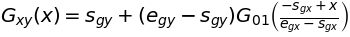

In [5]:
Eq_m_0 = Eq(G_xy(x), (e_gy-s_gy)*G_01((x-s_gx)/(e_gx-s_gx))+s_gy)
Eq_m_0

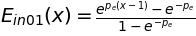

In [6]:
_E_in01 = Eq(E_in01(x), (1/(1-exp(-p_e)))*(exp(p_e*(x-1))-exp(-p_e)))
_E_in01

In [7]:
_P_in01 = Eq(P_in01(x), x**(p_p))
_P_in01

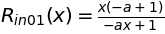

In [8]:
_R_in01 = Eq(R_in01(x), (1-a)*x/(1-a*x))
_R_in01

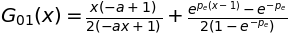

In [31]:
# Eq_m_1 = Eq(G_01(x), (1/(1-exp(-p)))*(exp(p*(x-1))-exp(-p)))
# Eq_m_1 = Eq(G_01(x), (1-a)*x/(1-a*x))
# Eq_m_1 = Eq(G_01(x), 1-cos(pi/2 * x))
# Eq_m_1 = Eq(G_01(x), 1-sqrt(1-x*x))
# Eq_m_1 = Eq(G_01(x), x**(p))
Eq_m_1 = Eq(G_01(x), (_E_in01.rhs+_R_in01.rhs)/2)
'''
d_in = (1+sqrt(1+4*c))/2
e_in = -c*(1/d_in+1)
Eq_m_1 = Eq(G_01(x), c/(d_in-x) + c + e_in)
'''
Eq_m_1

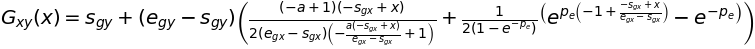

In [11]:
Eq_m_0_1 = Eq(G_xy(x), Eq_m_0.rhs.subs({G_01((x-s_gx)/(e_gx-s_gx)):Eq_m_1.rhs.subs({x:(x-s_gx)/(e_gx-s_gx)})}))
Eq_m_0_1

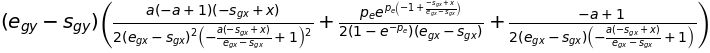

In [12]:
diff(Eq_m_0_1.rhs, x)

Solution

In [13]:
Eq_0 = Eq(G_xy(e_gx), O_xy(e_gx))
Eq_0

In [14]:
Eq_1 = Eq(Subs(Derivative(G_xy(x), x), x, e_gx), Subs(Derivative(O_xy(x), x), x, e_gx))
Eq_1

⎛d          ⎞│         ⎛d          ⎞│      
⎜──(G_xy(x))⎟│       = ⎜──(O_xy(x))⎟│      
⎝dx         ⎠│x=e_gx   ⎝dx         ⎠│x=e_gx

In [15]:
Eq_2 = Eq(Subs(Derivative(G_xy(x), x), x, s_gx), s_s)
Eq_2

⎛d          ⎞│           
⎜──(G_xy(x))⎟│       = sₛ
⎝dx         ⎠│x=s_gx     

In [16]:
Eq_3 = Eq(s_gx, e_gx - r_d)
Eq_3

In [17]:
Eq_0_1 = Eq(Eq_m_0_1.rhs.subs({x:e_gx, s_gx: Eq_3.rhs}), O_xy(e_gx))
Eq_0_1

In [18]:
Eq_1_1 = Eq(diff(Eq_m_0_1.rhs, x).subs({x:e_gx, s_gx:Eq_3.rhs, e_gy:O_xy(e_gx)}), Eq_1.rhs)
Eq_1_1

                     ⎛      a                 pₑ            1  ⎞   ⎛d         
(-s_gy + O_xy(e_gx))⋅⎜────────────── + ──────────────── + ─────⎟ = ⎜──(O_xy(x)
                     ⎜2⋅r_d⋅(-a + 1)         ⎛     -pₑ⎞   2⋅r_d⎟   ⎝dx        
                     ⎝                 2⋅r_d⋅⎝1 - ℯ   ⎠        ⎠              

 ⎞│      
)⎟│      
 ⎠│x=e_gx
         

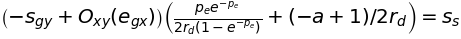

In [19]:
Eq_2_1 = Eq(diff(Eq_m_0_1.rhs, x).subs({x:Eq_3.rhs, s_gx:Eq_3.rhs, e_gy:O_xy(e_gx)}), s_s)
Eq_2_1

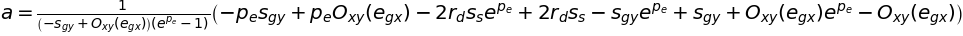

In [25]:
Eq_2_2 = Eq(a, solve(Eq_2_1, a)[0].factor())
Eq_2_2

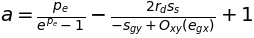

In [36]:
Eq_2_2_simplified = Eq(a, 1+p_e/(exp(p_e)-1)+(-2*r_d*s_s)/(-s_gy+O_xy(e_gx)))
Eq_2_2_simplified

In [40]:
Eq_1_1_2_2 = Eq_1_1.subs({a:Eq_2_2_simplified.rhs, e_gy:O_xy(e_gx)})
Eq_1_1_2_2

                     ⎛                                 pₑ          2⋅r_d⋅sₛ   
                     ⎜                              ─────── - ────────────────
                     ⎜                               pₑ       -s_gy + O_xy(e_g
                     ⎜       pₑ            1        ℯ   - 1                   
(-s_gy + O_xy(e_gx))⋅⎜──────────────── + ───── + ─────────────────────────────
                     ⎜      ⎛     -pₑ⎞   2⋅r_d         ⎛     pₑ          2⋅r_d
                     ⎜2⋅r_d⋅⎝1 - ℯ   ⎠           2⋅r_d⋅⎜- ─────── + ──────────
                     ⎜                                 ⎜   pₑ       -s_gy + O_
                     ⎝                                 ⎝  ℯ   - 1             

         ⎞                       
── + 1   ⎟                       
x)       ⎟                       
         ⎟   ⎛d          ⎞│      
─────────⎟ = ⎜──(O_xy(x))⎟│      
⋅sₛ     ⎞⎟   ⎝dx         ⎠│x=e_gx
────────⎟⎟                       
xy(e_gx)⎟⎟                       
        ⎠⎠      

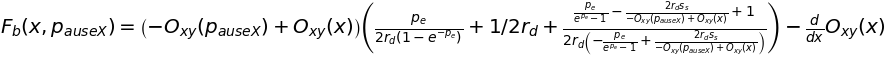

In [41]:
Eq_bisection = Eq(F_b(x, p_auseX), Eq_1_1_2_2.lhs.subs({e_gx:x, s_gy:O_xy(p_auseX), s_gx:p_auseX-r_d}) - diff(O_xy(x), x))
Eq_bisection

In [ ]:
Eq_bisection_simplified = Eq

In [18]:
Eq_newton = Eq(F_n(x, p_auseX), x - Eq_bisection.rhs/diff(Eq_bisection.rhs, x))
Eq_newton

NameError: name 'Eq_bisection' is not defined

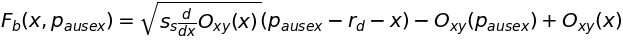

In [19]:
p_ausex = symbols('p_ausex')
Eq_bisection3 = Eq(F_b(x, p_ausex), -O_xy(p_ausex)+O_xy(x)+sqrt(s_s*diff(O_xy(x), x))*(p_ausex - r_d - x))
Eq_bisection3

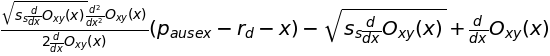

In [20]:
diff(Eq_bisection3.rhs, x)

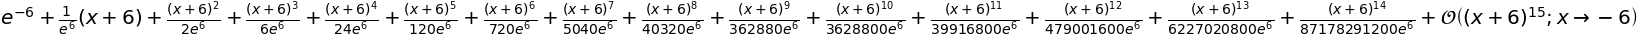

In [21]:
series(exp(x), n=15, x0=-6)

In [22]:
Eq(Subs(Derivative(G_xy(x), x), x, s_gx), s_s)

⎛d          ⎞│           
⎜──(G_xy(x))⎟│       = sₛ
⎝dx         ⎠│x=s_gx     

In [23]:
Eq(Subs(Derivative(G_xy(x), x), x, e_gx), s_e)

⎛d          ⎞│           
⎜──(G_xy(x))⎟│       = sₑ
⎝dx         ⎠│x=e_gx     